# Soil map dataset

### In this notebook, we explore soil data from multiple perspectives to understand land characteristics in the Netherlands. We analyze how the land is used, look at soil types and regions using national soil maps, and investigate detailed soil profile information, including layers and horizons. Additionally, we consider the physical composition of soil, such as particle size distribution and characteristics of both top and bottom layers. 

In [2]:
import pandas
import os
import geopandas
from shapely import geometry
import matplotlib.pyplot as plt
import fiona
import numpy as np
import zipfile
import tempfile
import geopandas as gpd
import rioxarray
import contextily as cx
import matplotlib.pyplot as plt
# import seaborn as sns
import rasterio

### Type of the soil dataset

This dataset represents different land areas in the Netherlands, categorized by soil types and land use. Each row describes a specific region with attributes such as the name (LMM14naam), soil type (HGRnaam), surface area (Oppkm2 in square kilometers and OppHa in hectares), and geometry (MULTIPOLYGON) used for spatial mapping.

In [27]:
# load the data
current_dir = os.getcwd()

# go one folder back using
parent_dir = os.path.dirname(current_dir)

soil_type_path = os.path.join(parent_dir, "data", "type_of_soil_data", "LMM14_HGR.shp")

In [28]:
lmm = geopandas.read_file(soil_type_path)
print(lmm.columns)
lmm.head()

Index(['LMM14nr', 'LMM14naam', 'HGRnr', 'HGRnaam', 'Oppkm2', 'OppHa', 'groep',
       'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')


LMM14nr                  LMM14naam  HGRnr HGRnaam  Oppkm2     OppHa groep  \
0        1   Noordelijk Zeekleigebied      2    klei    2782  278155.0  Klei   
1        2   Noordelijk Veenweidegeb.      3    veen    1657  165741.0  Veen   
2        3  Polders en Droogmakerijen      2    klei    3422  342242.0  Klei   
3        4    Westelijk Veenweidegeb.      3    veen    1929  192919.0  Veen   
4        5   Zuidwestelijk Kleigebied      2    klei    3630  363042.0  Klei   

     Shape_Leng    Shape_Area  \
0  6.914546e+05  2.781548e+09   
1  4.736756e+05  1.657414e+09   
2  1.003352e+06  3.422415e+09   
3  7.014368e+05  1.929187e+09   
4  1.638755e+06  3.630416e+09   

                                            geometry  
0  MULTIPOLYGON (((153749 565427, 153793 565364, ...  
1  MULTIPOLYGON (((184855 511154, 184892 511129, ...  
2  MULTIPOLYGON (((92170.4 460493.696, 92437.4 46...  
3  MULTIPOLYGON (((147852.2 476898.22, 147938.05 ...  
4  MULTIPOLYGON (((25134.069 381458.669, 25226.24...

Display the soil types on the map

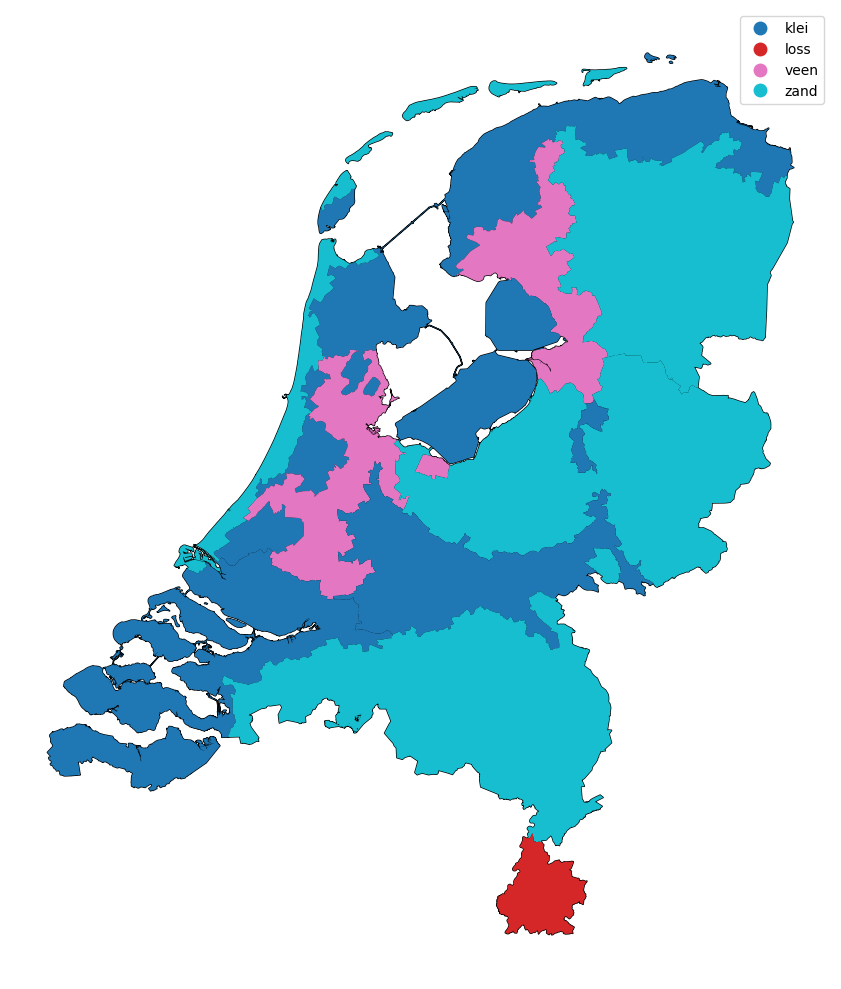

In [89]:
fig, ax = plt.subplots(figsize=(10, 10))
lmm.plot(ax=ax, edgecolor='black', facecolor='lightgrey')

lmm.plot(column='HGRnaam', ax=ax, legend=True)
ax.set_axis_off()
plt.tight_layout()
plt.show()

### Land use dataset (surface data structure)

This dataset comes from https://lgn.nl/bestanden. It represents land use classification based on the LGN7 (Landelijk Grondgebruik Nederland) raster map of the Netherlands. Each pixel in the raster image corresponds to a specific land use type, coded with integer values from 0 to 62 (e.g., agricultural land, forest, water, urban areas).

In [29]:
# load the data
current_dir = os.getcwd()

# go one folder back using
parent_dir = os.path.dirname(current_dir)

land_use_path = os.path.join(parent_dir, "data", "LGN7_land_use", "LGN7.tif")

Below we see that this is a surface data structure with only one layer (band)

In [33]:
lgn = rioxarray.open_rasterio(land_use_path, masked=True)
print(lgn)

<xarray.DataArray (band: 1, y: 13000, x: 11200)> Size: 582MB
[145600000 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 90kB 12.5 37.5 62.5 ... 2.799e+05 2.8e+05 2.8e+05
  * y            (y) float64 104kB 6.25e+05 6.25e+05 6.249e+05 ... 3e+05 3e+05
    spatial_ref  int64 8B 0
Attributes:
    TIFFTAG_SOFTWARE:  GRASS GIS 7.8.2 with GDAL 3.0.4
    AREA_OR_POINT:     Area
    scale_factor:      1.0
    add_offset:        0.0


In [36]:
# checking some basic characteristics of the dataset, like shape, and land codes.
print("Raster size:", lgn.shape)
print("Unique land use codes:", np.unique(lgn))

Raster size: (1, 13000, 11200)
Unique land use codes: [ 1.  2.  3.  4.  5.  6.  8.  9. 10. 11. 12. 16. 17. 18. 19. 20. 22. 23.
 24. 25. 26. 28. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43.
 45. 61. 62. nan]


Display land use on the map

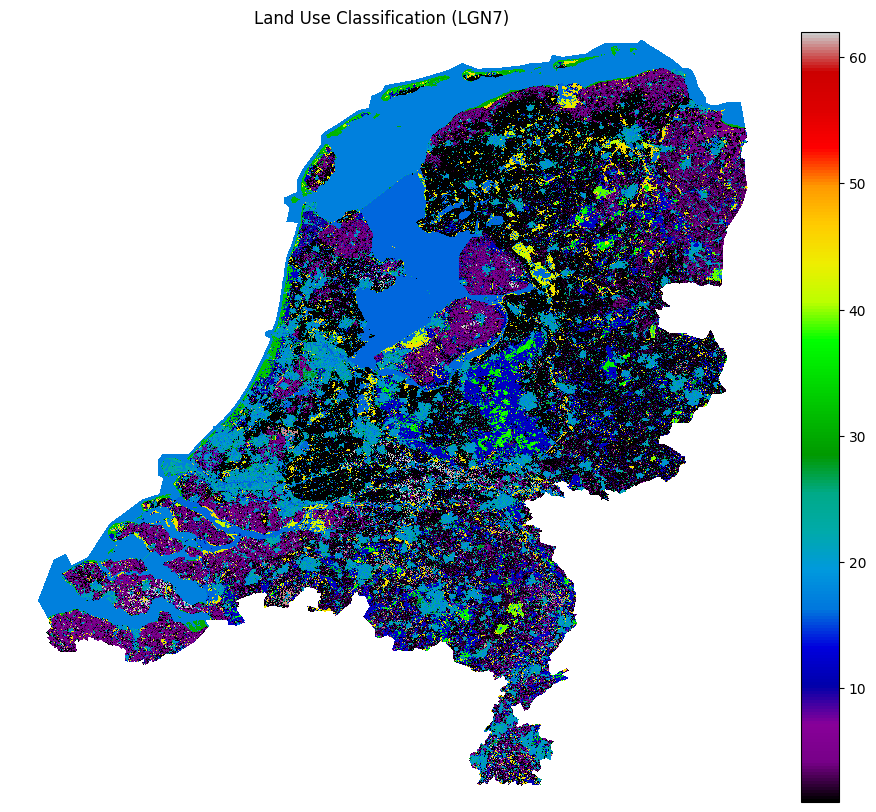

In [35]:
lgn.plot(cmap="nipy_spectral", figsize=(12, 10))
plt.title("Land Use Classification (LGN7)")
plt.axis("off")
plt.show()

In [3]:
tif_path_2021 = "/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/data/raw/LGN2021/LGN2021.tif"

# Open the raster file
with rasterio.open(tif_path_2021) as src:
    print("File name:", tif_path_2021)
    print("CRS (Coordinate Reference System):", src.crs)
    print("Bounds (Extent):", src.bounds)
    print("Resolution (Pixel Size):", src.res)
    print("Width (columns):", src.width)
    print("Height (rows):", src.height)
    print("Number of bands:", src.count)
    print("Data type:", src.dtypes[0])
    print("Transform (Affine):", src.transform)

File name: /Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/data/raw/LGN2021/LGN2021.tif
CRS (Coordinate Reference System): EPSG:28992
Bounds (Extent): BoundingBox(left=0.0, bottom=300000.0, right=280000.0, top=625000.0)
Resolution (Pixel Size): (5.0, 5.0)
Width (columns): 56000
Height (rows): 65000
Number of bands: 1
Data type: uint16
Transform (Affine): | 5.00, 0.00, 0.00|
| 0.00,-5.00, 625000.00|
| 0.00, 0.00, 1.00|


In [5]:
import rasterio
from rasterio.transform import rowcol
from pyproj import Transformer

# Your point (WGS84)
lon, lat = 5.104480, 52.092876

# Step 1: Transform WGS84 → EPSG:28992
transformer = Transformer.from_crs("EPSG:4326", "EPSG:28992", always_xy=True)
x, y = transformer.transform(lon, lat)
print("Transformed point (RD):", x, y)

# Step 2: Open the raster
with rasterio.open(tif_path_2021) as src:
    # Step 3: Get row and column for the point
    row, col = src.index(x, y)
    print("Pixel location:", row, col)
    
    # Step 4: Read the pixel value
    value = src.read(1)[row, col]
    print("Land use code at point:", value)

Transformed point (RD): 135625.09506847514 456106.6168161818
Pixel location: 33778 27125
Land use code at point: 251


## Soil map dataset

This dataset is a multi-layered soil database that includes pedological properties and land characteristics.

Data source: https://bodemdata.nl/downloads

In [12]:
# load the data
current_dir = os.getcwd()

# go one folder back using
parent_dir = os.path.dirname(current_dir)

soil_physical_properties_path = os.path.join(parent_dir, "data", "Wageningen_soil_map", "BRO-SGM-DownloadBodemkaart-V2024-01_1.gpkg.zip")

Temorary unzip a heavy GeoPackage file

In [21]:
with zipfile.ZipFile(soil_physical_properties_path, 'r') as zip_ref:
    gpkg_name = [f for f in zip_ref.namelist() if f.endswith('.gpkg')][0]

    # Create a temporary file for the .gpkg
    with tempfile.NamedTemporaryFile(suffix=".gpkg") as tmp_gpkg:
        # Write the contents of the .gpkg file to the temp file
        tmp_gpkg.write(zip_ref.read(gpkg_name))
        tmp_gpkg.flush()

        # Below we read and save only needed layers
        # containts soil characteristics
        horizon = gpd.read_file(tmp_gpkg.name, layer="soilhorizon")

        # a relationship between tables
        profile_area = gpd.read_file(tmp_gpkg.name, layer="soilarea_normalsoilprofile")

        # table with Polygons
        areas = gpd.read_file(tmp_gpkg.name, layer="soilarea")

        # table with land use
        land_use = gpd.read_file(tmp_gpkg.name, layer="normalsoilprofiles_landuse")

        soil_layer = gpd.read_file(tmp_gpkg.name, layer="soillayer")

/Users/Administrator/Library/Python/3.9/lib/python/site-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'tmpycskdo6s.gpkg': 'areaofpedologicalinterest' (default), 'soilarea', 'nga_properties', 'soilmap', 'normalsoilprofiles', 'normalsoilprofiles_landuse', 'soilhorizon', 'soilhorizon_fractionparticlesize', 'soillayer', 'soil_units', 'soilcharacteristics_bottomlayer', 'soilcharacteristics_toplayer', 'soilarea_normalsoilprofile', 'soilarea_soilunit', 'soilarea_soilunit_soilcharacteristicstoplayer', 'soilarea_soilunit_soilcharacteristicsbottomlayer'. Specify layer parameter to avoid this warning.
  result = read_func(
/Users/Administrator/Library/Python/3.9/lib/python/site-packages/pyogrio/raw.py:198: RuntimeWarning: Unexpected data type for record 1 in column validfrom
  return ogr_read(


In [22]:
# tables of the database
fiona.listlayers(soil_physical_properties_path)

['areaofpedologicalinterest',
 'soilarea',
 'nga_properties',
 'soilmap',
 'normalsoilprofiles',
 'normalsoilprofiles_landuse',
 'soilhorizon',
 'soilhorizon_fractionparticlesize',
 'soillayer',
 'soil_units',
 'soilcharacteristics_bottomlayer',
 'soilcharacteristics_toplayer',
 'soilarea_normalsoilprofile',
 'soilarea_soilunit',
 'soilarea_soilunit_soilcharacteristicstoplayer',
 'soilarea_soilunit_soilcharacteristicsbottomlayer']

Load only relevant tables (layers) such as soil horizons, areas, land use, soil layers

Join tables to so for each Polygon we will have a correspoinding soil characteristics.

In [23]:
# join 'soilhorizon' with 'soilarea_normalsoilprofile'
horizon_profiles_area = horizon.merge(profile_area, on="normalsoilprofile_id")

# join to 'normalsoilprofiles_landuse'
horizon_profiles_area_landuse = horizon_profiles_area.merge(land_use,  on="normalsoilprofile_id")

area_geometry = areas[["maparea_id", "geometry"]]           # here we keep only necessary columns
horizon_with_geom = horizon_profiles_area_landuse.merge(area_geometry, on="maparea_id")

Convert resultant table into GeoDataFrame

In [24]:
soil_geo = geopandas.GeoDataFrame(horizon_with_geom, geometry="geometry")

Now we have all needed columns in one table.

In [25]:
print(soil_geo.columns)
soil_geo.shape

Index(['normalsoilprofile_id', 'layernumber', 'faohorizonnotation',
       'lowervalue', 'uppervalue', 'staringseriesblock',
       'organicmattercontent', 'minimumorganicmattercontent',
       'maximumorganicmattercontent', 'acidity', 'minimumacidity',
       'maximumacidity', 'cnratio', 'peattype', 'calciccontent', 'fedith',
       'loamcontent', 'minimumloamcontent', 'maximumloamcontent',
       'lutitecontent', 'minimumlutitecontent', 'maximumlutitecontent',
       'sandmedian', 'minimumsandmedian', 'maximumsandmedian', 'siltcontent',
       'density', 'inspireid', 'validfrom', 'beginlifespanversion',
       'maparea_id', 'landuse', 'geometry'],
      dtype='object')


(215640, 33)

The boundries of all Polygons (there are around 47000 polygons)

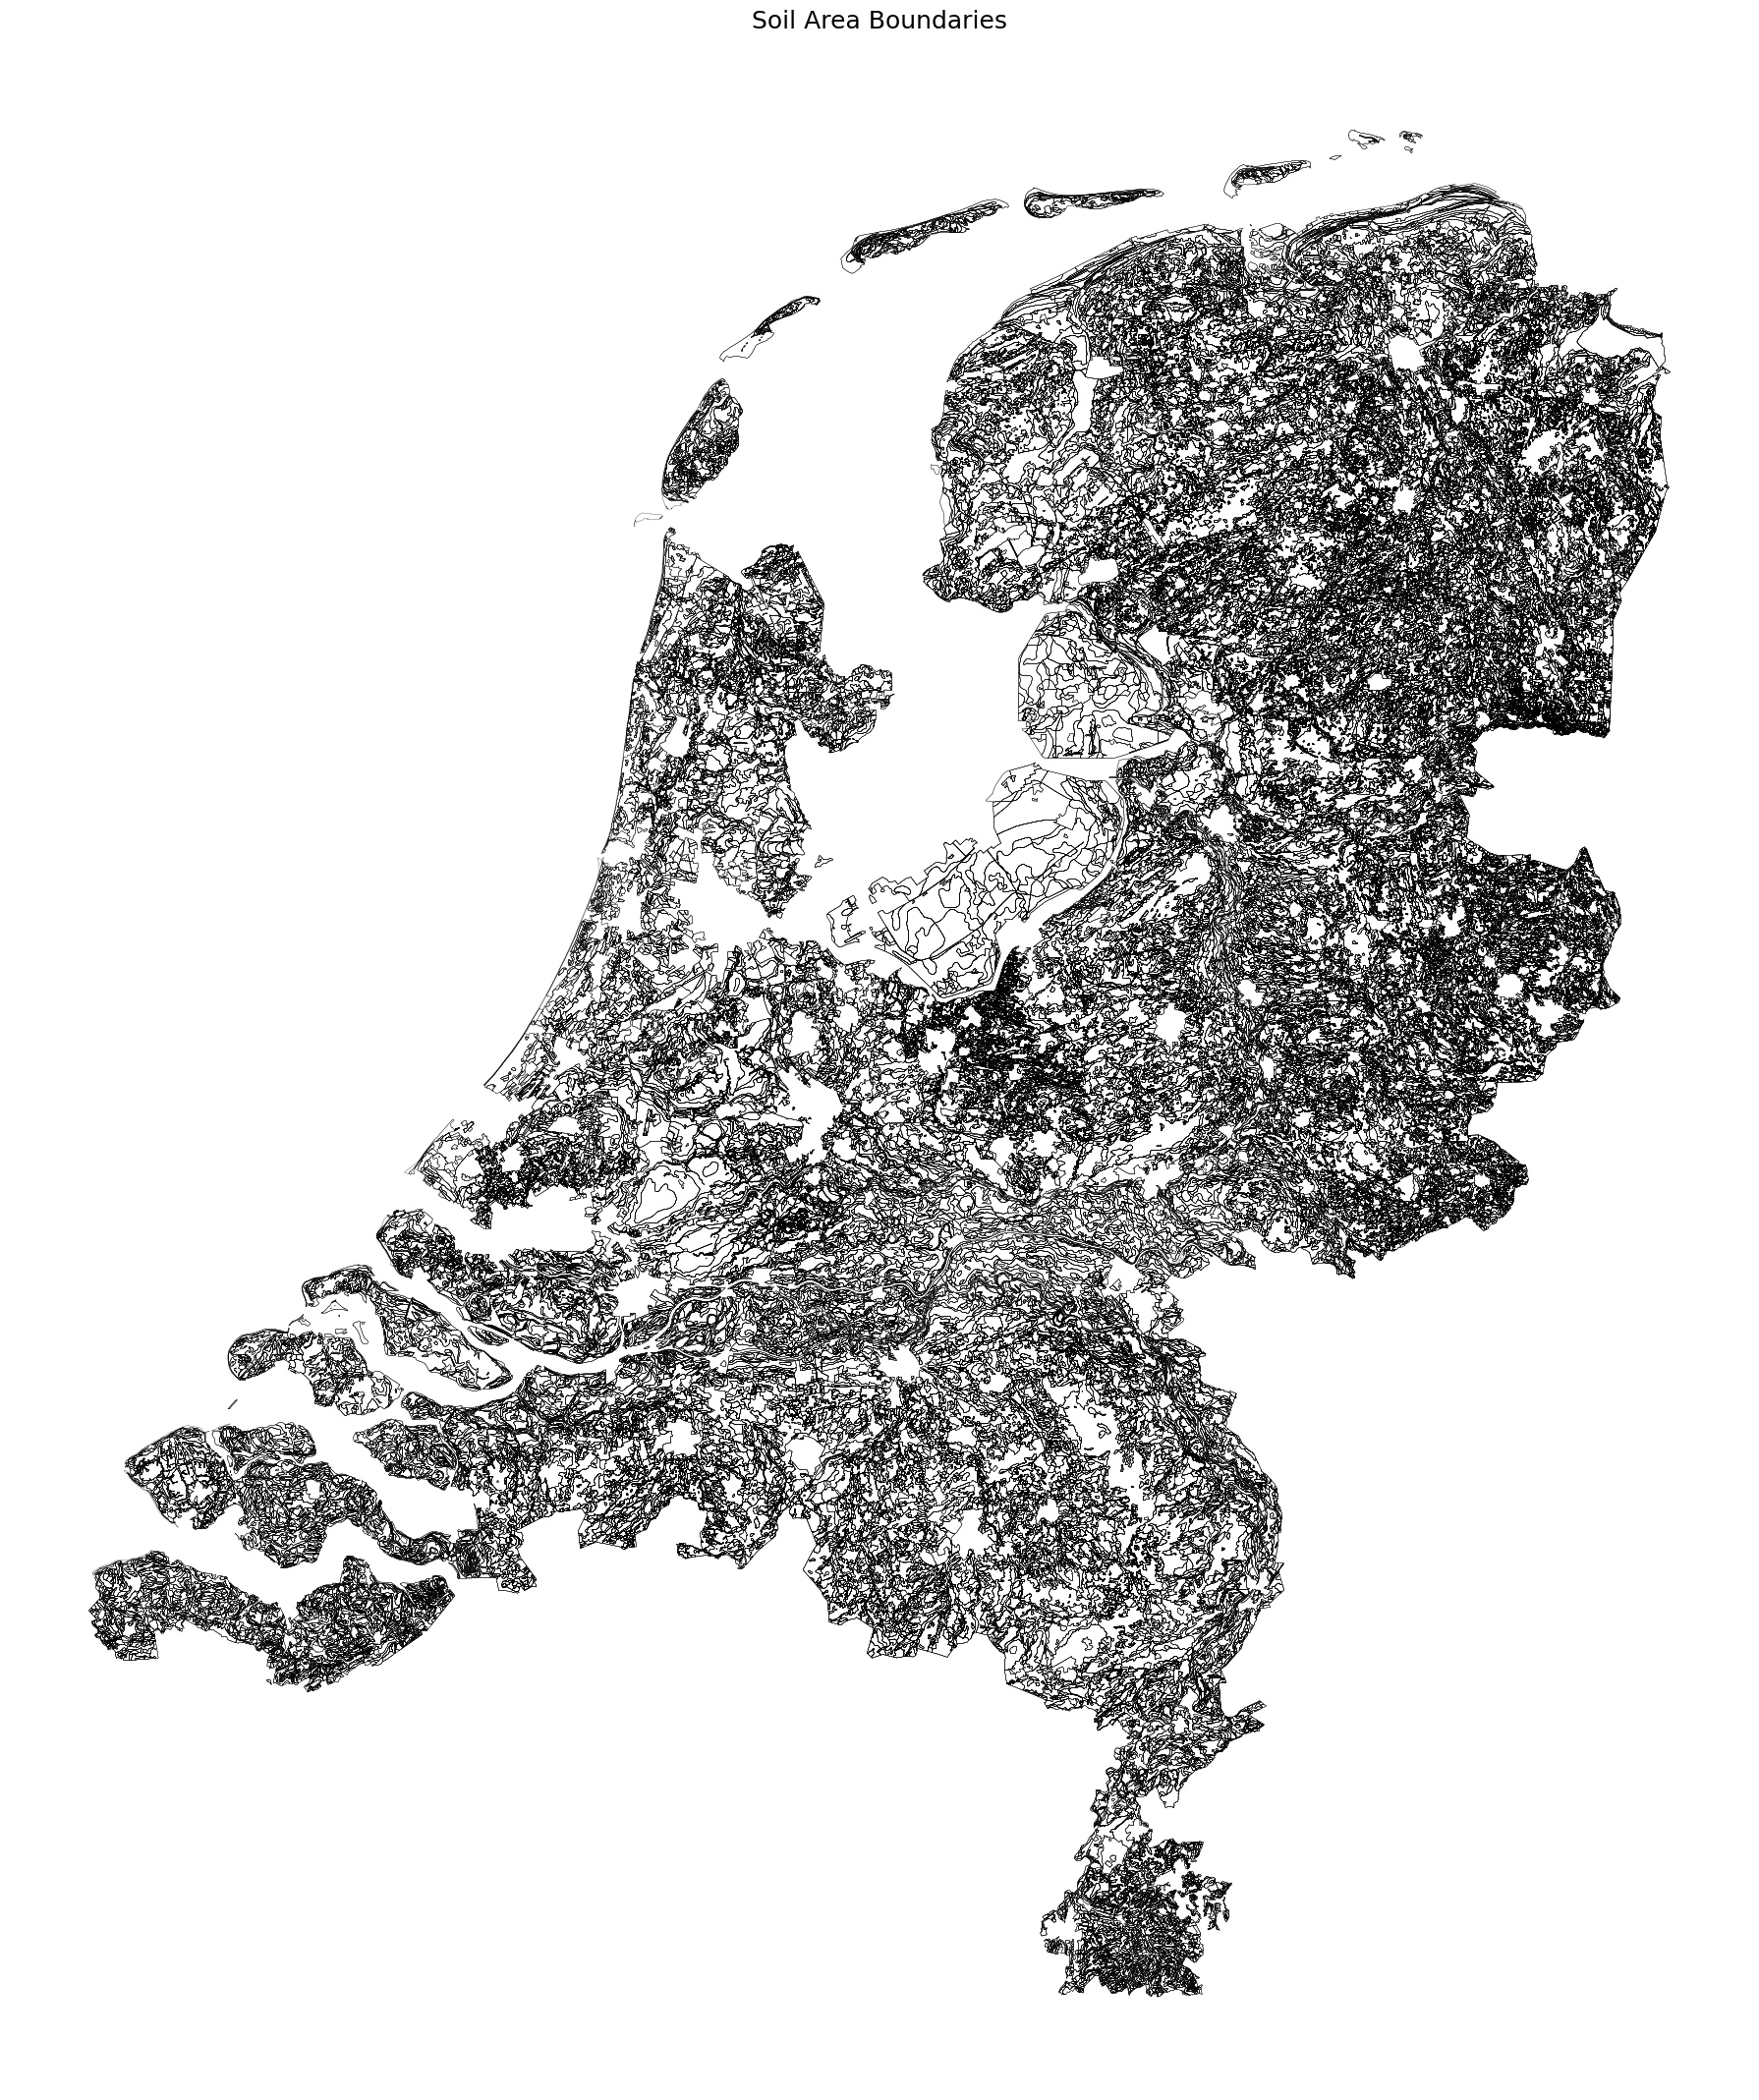

In [26]:
fig, ax = plt.subplots(figsize=(18, 24))

soil_geo.boundary.plot(ax=ax, linewidth=0.2, color="black")
ax.set_title("Soil Area Boundaries", fontsize=18)
ax.set_axis_off()

plt.tight_layout()
plt.show()

Display on map different layers. For visual purposes the 'organic matter' is chosen.

<Axes: >

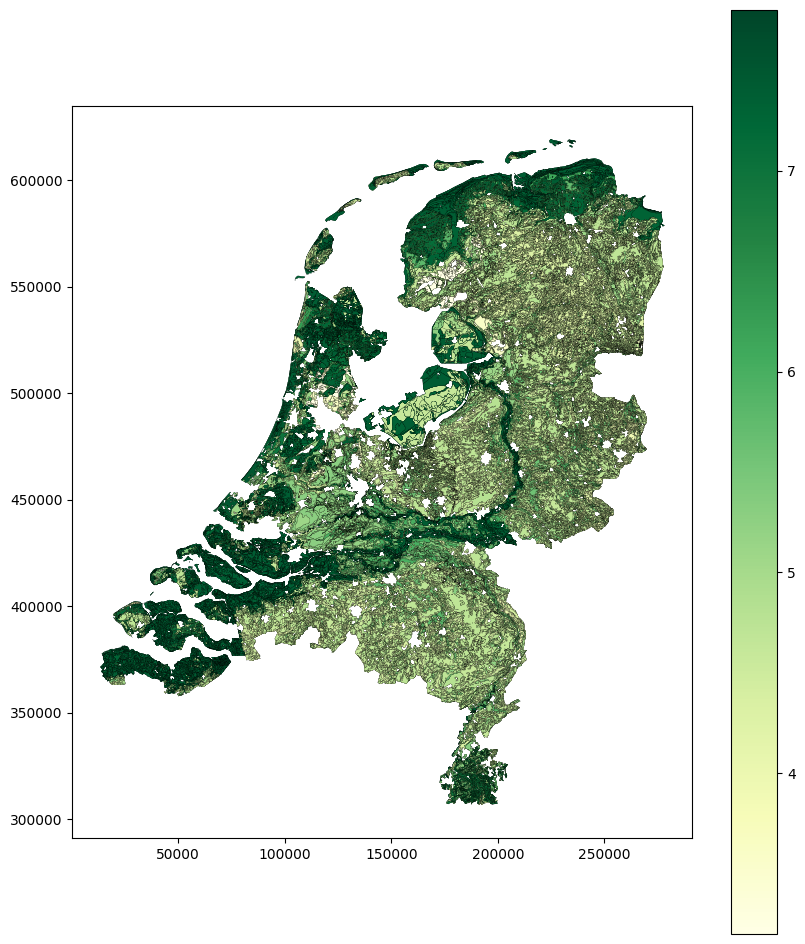

In [146]:
soil_geo_valid = soil_geo[soil_geo["organicmattercontent"].notna()]

soil_geo_valid.plot(
    column="acidity",
    cmap="YlGn",
    legend=True,
    edgecolor="black",
    linewidth=0.1,
    figsize=(10, 12)
)

General information about each variable in the table

In [78]:
soil_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 215640 entries, 0 to 215639
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   normalsoilprofile_id         215640 non-null  int64         
 1   layernumber                  215640 non-null  int64         
 2   faohorizonnotation           215640 non-null  object        
 3   lowervalue                   215640 non-null  float32       
 4   uppervalue                   215640 non-null  float32       
 5   staringseriesblock           215640 non-null  int64         
 6   organicmattercontent         215640 non-null  float32       
 7   minimumorganicmattercontent  215640 non-null  float32       
 8   maximumorganicmattercontent  215640 non-null  float32       
 9   acidity                      215640 non-null  float32       
 10  minimumacidity               215640 non-null  float32       
 11  maximumacidity    

Range of each variable

In [81]:
soil_geo.describe()

normalsoilprofile_id    layernumber     lowervalue     uppervalue  \
count          2.156400e+05  215640.000000  215640.000000  215640.000000   
mean           1.429324e+07       2.782026       0.360862       0.635492   
min            1.010000e+03       1.000000       0.000000       0.050000   
25%            4.040000e+03       2.000000       0.080000       0.250000   
50%            1.029000e+04       3.000000       0.300000       0.600000   
75%            9.024010e+06       4.000000       0.600000       1.050000   
max            9.031003e+07       9.000000       1.100000       1.200000   
std            3.078568e+07       1.393233       0.309634       0.389616   

       staringseriesblock  organicmattercontent  minimumorganicmattercontent  \
count       215640.000000         215640.000000                215640.000000   
mean           173.228937              9.004340                     5.380112   
min            101.000000              0.200000                     0.100000   
25%            110.000000              0.600000                     0.300000   
50%            202.000000              2.000000                     1.000000   
75%            208.000000              5.000000                     3.000000   
max            218.000000             95.000000                    75.000000   
std             47.395336             19.761105                    13.275514   

       maximumorganicmattercontent        acidity  minimumacidity  ...  \
count                215640.000000  215640.000000   215640.000000  ...   
mean                     13.139223       5.110847        4.651786  ...   
min                       0.500000       3.200000        2.900000  ...   
25%                       2.000000       4.500000        4.000000  ...   
50%                       5.000000       4.800000        4.500000  ...   
75%                      10.000000       5.300000        4.800000  ...   
max                      98.000000       7.800000        7.500000  ...   
std                      23.002916       1.045650        1.052343  ...   

       lutitecontent  minimumlutitecontent  maximumlutitecontent  \
count  215640.000000         215640.000000         215640.000000   
mean       12.277449              7.974369             18.424912   
min         1.000000              1.000000              4.000000   
25%         3.000000              2.000000              6.000000   
50%         4.000000              3.000000              8.000000   
75%        18.000000             10.000000             25.000000   
max        68.000000             50.000000             80.000000   
std        14.106943             10.019105             18.413254   

          sandmedian  minimumsandmedian  maximumsandmedian    siltcontent  \
count  215640.000000      215640.000000      215640.000000  215640.000000   
mean      142.790322         120.398697         173.587553      20.712669   
min        70.000000          60.000000          90.000000       1.000000   
25%       125.000000         100.000000         150.000000       8.000000   
50%       150.000000         130.000000         180.000000      15.000000   
75%       160.000000         140.000000         180.000000      34.000000   
max       500.000000         200.000000         800.000000      81.000000   
std        37.887809          30.397178          54.931789      16.999535   

             density  validfrom  beginlifespanversion  
count  215640.000000          0                     0  
mean        1.342015        NaT                   NaT  
min         0.167000        NaT                   NaT  
25%         1.330000        NaT                   NaT  
50%         1.446000        NaT                   NaT  
75%         1.601000        NaT                   NaT  
max         1.680000        NaT                   NaT  
std         0.395995        NaN                   NaN  

[8 rows x 27 columns]

Check for missing values

In [82]:
soil_geo.isnull().sum().sort_values(ascending=False)

beginlifespanversion           215640
validfrom                      215640
peattype                       192057
normalsoilprofile_id                0
minimumsandmedian                   0
lutitecontent                       0
minimumlutitecontent                0
maximumlutitecontent                0
sandmedian                          0
siltcontent                         0
maximumsandmedian                   0
minimumloamcontent                  0
density                             0
inspireid                           0
maparea_id                          0
landuse                             0
maximumloamcontent                  0
loamcontent                         0
layernumber                         0
fedith                              0
calciccontent                       0
cnratio                             0
maximumacidity                      0
minimumacidity                      0
acidity                             0
maximumorganicmattercontent         0
minimumorgan

Distribution of horizon types

Below is an overview of the horizons for which we have the most information in the dataset.

FAO soil horizon notations — a standardized way to describe distinct soil layers. Capital letters indicate master horizons (like O -- Organic horizon or C -- Parent rock)

Text(0, 0.5, 'Count')

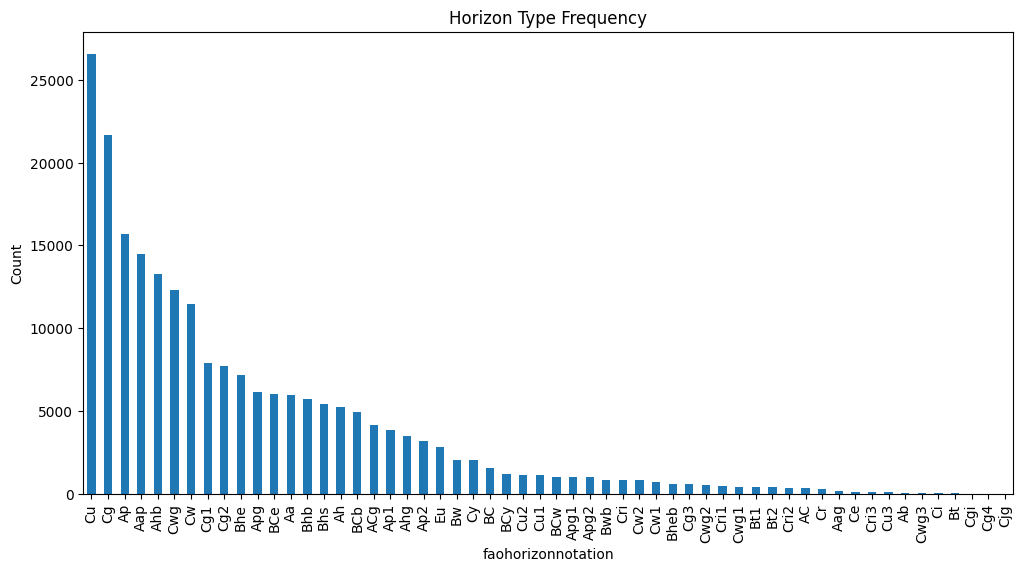

In [98]:
plt.figure(figsize=(12, 6)) 
soil_geo["faohorizonnotation"].value_counts().plot(kind="bar", title="Horizon Type Frequency")
plt.ylabel("Count")

Check the thickness of most of the layers in the soil

<Axes: xlabel='thickness', ylabel='Count'>

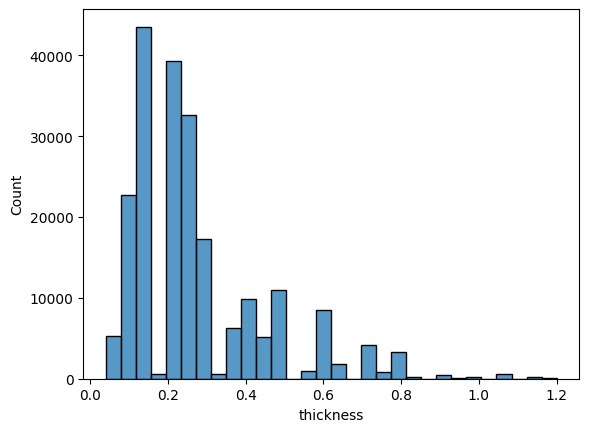

In [85]:
soil_geo["thickness"] = soil_geo["uppervalue"] - soil_geo["lowervalue"]
sns.histplot(soil_geo["thickness"], bins=30)

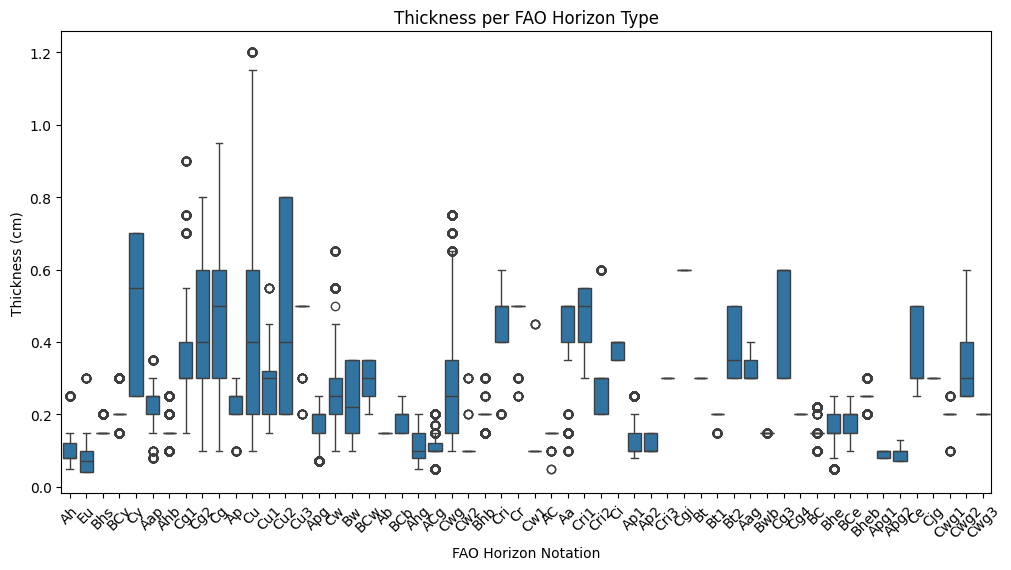

In [96]:
plt.figure(figsize=(12, 6)) 
sns.boxplot(data=soil_geo, x="faohorizonnotation", y="thickness")
plt.xticks(rotation=45)
plt.title("Thickness per FAO Horizon Type")
plt.ylabel("Thickness (cm)")
plt.xlabel("FAO Horizon Notation")
plt.show()

Soil composition variables

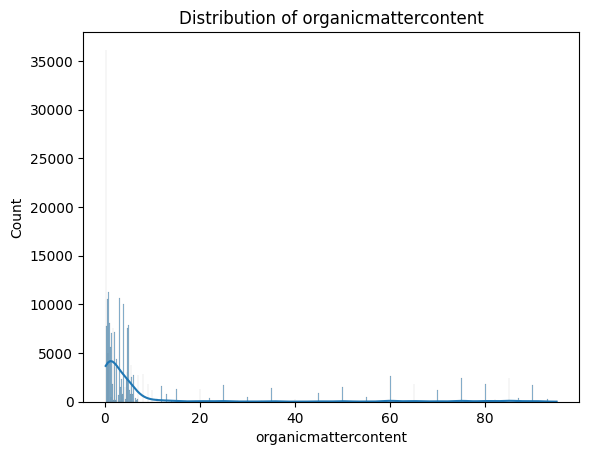

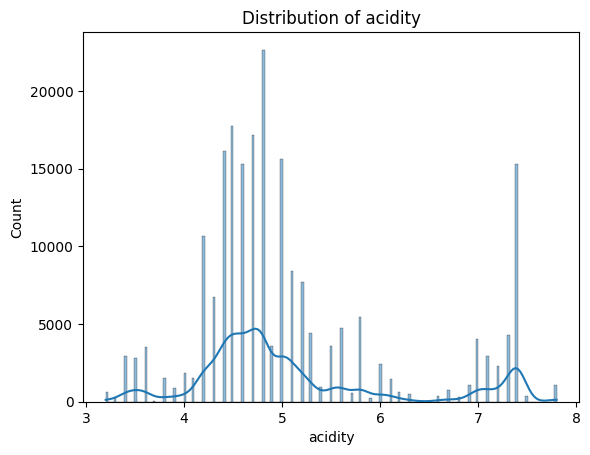

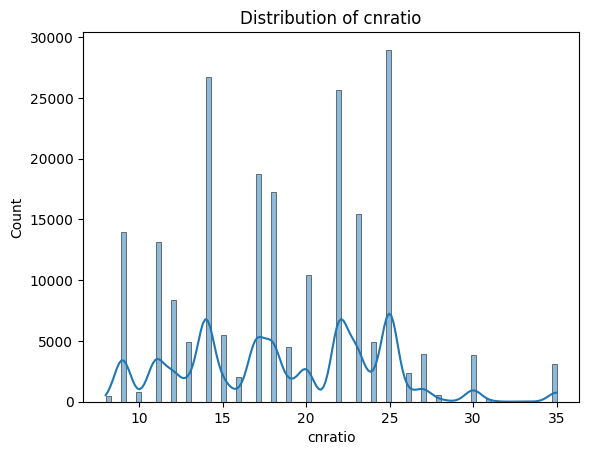

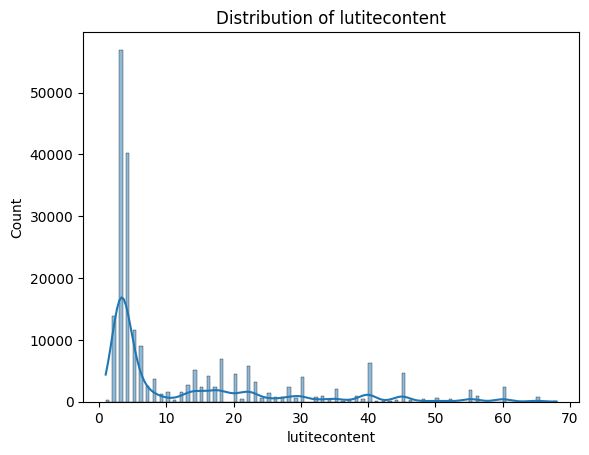

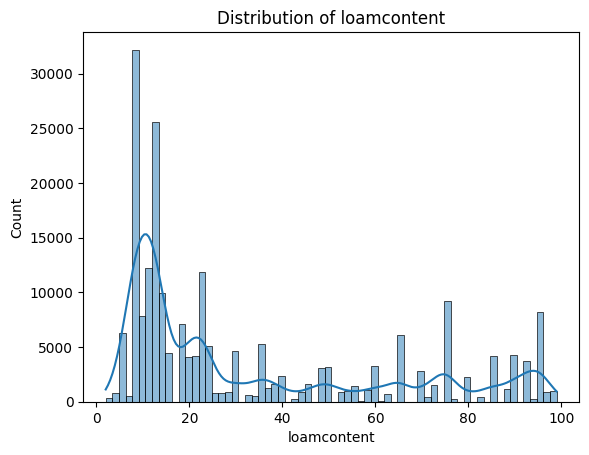

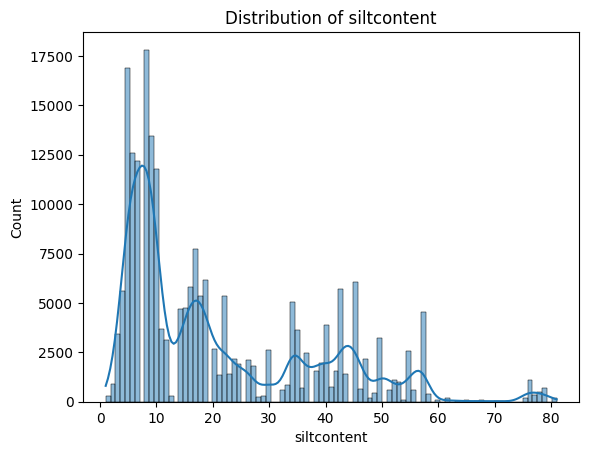

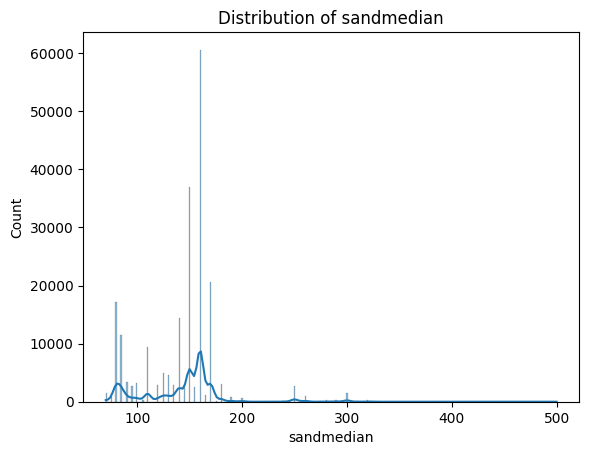

In [102]:
features = [
    "organicmattercontent", "acidity", "cnratio", "lutitecontent",
    "loamcontent", "siltcontent", "sandmedian"
]

for feature in features:
    sns.histplot(soil_geo[feature].dropna(), kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()